In [9]:
import os
from pathlib import Path
import bifacial_radiance


In [10]:
#Weather File:
epwfile1 = r'C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Site1.epw'
epwfile2 = r'C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Site2.epw'
epwfile3 = r'C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Site3.epw'

<a id='step0b'></a>

## Case 1

In [3]:
testfolder = Path().resolve().parent.parent / 'bifacial_radiance' / 'TEMP' / 'Case1'

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\bifacial_radiance\TEMP')  

print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Case1


In [4]:
try:
    os.mkdir(testfolder)
except OSError:
    print ("Folder maybe existed or else failed for other reason. Check.")
    print(testfolder)
else:
    print ("Successfully created the directory %s " % testfolder)

Folder maybe existed or else failed for other reason. Check.
C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Case1


In [7]:
# Case 1, AUSTRALIA
simulationName = 'Case_1'    # For adding a simulation name when defning RadianceObj. This is optional.
moduletype = 'Custom-Module'    # We will define the parameters for this below in Step 4.
epwfile = epwfile1
lat = -34.91
lon = 146.60

# Scene variables
nMods = 20
nRows = 7
hub_height = 1.3 # meters
gcr = 0.305
albedo = 0.2         
bifi = 0.8

# Traking parameters
cumulativesky = False
limit_angle = 52 # 72.1 # tracker rotation limit angle
angledelta = 0.01 # we will be doing hourly simulation, we want the angle to be as close to real tracking as possible.
backtrack = True 
axisofrotationTorqueTube = False

#Torquetube Params
torqueTube = False
diameter = 0.1
tubetype = 'round'    # This will make an octagonal torque tube.
torqueTubeMaterial = 'black'   # Torque tube of this material (0% reflectivity)
zgap = 0

#makeModule parameters
x = 1
y = 1.98
xgap = 0.01
ygap = 0
numpanels = 1
axis_azimuth = 187 

sensorsy = 9
#sensorsy =100 # HPC Value

### Do one day of simulation to compare Hourly

In [8]:
demo = bifacial_radiance.RadianceObj(simulationName, path = str(testfolder))  # Adding a simulation name. This is optional.
demo.setGround(albedo) 
metdata = demo.readWeatherFile(weatherFile = epwfile) 
mymodule = demo.makeModule(name=moduletype, x=x, y=y,
                torquetube=torqueTube, diameter=diameter, tubetype=tubetype, material=torqueTubeMaterial, 
                xgap=xgap, ygap=ygap, zgap=zgap, numpanels=numpanels, 
                axisofrotationTorqueTube=axisofrotationTorqueTube)
trackerdict = demo.set1axis(metdata = metdata, limit_angle = limit_angle, backtrack = backtrack, 
                            gcr = gcr, cumulativesky = cumulativesky)

startdate = '06/21'     
enddate = '06/22'
trackerdict = demo.gendaylit1axis(startdate=startdate, enddate=enddate) 
# making the different scenes for the 1-axis tracking for the dates in trackerdict2.

sceneDict = {'gcr': gcr,'hub_height':hub_height, 'nMods':nMods, 'nRows': nRows}  

trackerdict = demo.makeScene1axis(trackerdict = trackerdict, moduletype = moduletype, sceneDict = sceneDict) 
demo.makeOct1axis()
results = demo.analysis1axis()  #daydatename='06_21') <- development version.
print('\n\nHourly bifi gain: {:0.3}'.format(sum(demo.Wm2Back) / sum(demo.Wm2Front)))

path = C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Case1
Saving file EPWs\epw_temp.csv, # points: 8760

Module Name: Custom-Module
REWRITING pre-existing module file. 
Module Custom-Module successfully created


C:\ProgramData\Anaconda3\lib\site-packages\pvlib\tracking.py:449: RuntimeWarning: invalid value encountered in arccos
  wc = np.degrees(np.arccos(temp))
C:\ProgramData\Anaconda3\lib\site-packages\pvlib\tracking.py:473: RuntimeWarning: invalid value encountered in arccos
  aoi = np.degrees(np.arccos(np.abs(np.sum(sun_vec*panel_norm, axis=0))))
C:\ProgramData\Anaconda3\lib\site-packages\pvlib\tracking.py:568: RuntimeWarning: invalid value encountered in remainder
  surface_azimuth = surface_azimuth % 360
C:\ProgramData\Anaconda3\lib\site-packages\pvlib\tracking.py:572: RuntimeWarning: invalid value encountered in arccos
  surface_tilt = 90 - np.degrees(np.arccos(dotproduct))


Creating ~12 skyfiles.  Takes 1-2 minutes
Created 10 skyfiles in /skies/

Making ~10 .rad files for gendaylit 1-axis workflow (this takes a minute..)
10 Radfiles created in /objects/

Making 10 octfiles in root directory.
Created 1axis_06_21_08.oct
Created 1axis_06_21_09.oct
Created 1axis_06_21_10.oct
Created 1axis_06_21_11.oct
Created 1axis_06_21_12.oct
Created 1axis_06_21_13.oct
Created 1axis_06_21_14.oct
Created 1axis_06_21_15.oct
Created 1axis_06_21_16.oct
Created 1axis_06_21_17.oct
Linescan in process: 1axis_06_21_08_Front
Linescan in process: 1axis_06_21_08_Back
Saved: results\irr_1axis_06_21_08.csv
Index: 06_21_08. Wm2Front: 4.912009222222222. Wm2Back: 0.5679905888888889
Linescan in process: 1axis_06_21_09_Front
Linescan in process: 1axis_06_21_09_Back
Saved: results\irr_1axis_06_21_09.csv
Index: 06_21_09. Wm2Front: 380.72102222222225. Wm2Back: 8.680077666666666
Linescan in process: 1axis_06_21_10_Front
Linescan in process: 1axis_06_21_10_Back
Saved: results\irr_1axis_06_21_10.c

## CASE 2: Tanzania, Africa

In [11]:
testfolder = Path().resolve().parent / 'Case2'

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\bifacial_radiance\TEMP')  

print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Case2


In [22]:
try:
    os.mkdir(testfolder)
except OSError:
    print ("Folder maybe existed or else failed for other reason. Check")
    print(testfolder)
else:
    print ("Successfully created the directory %s " % testfolder)

Successfully created the directory C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Case2 


In [12]:
simulationName = 'Case_2'    # For adding a simulation name when defning RadianceObj. This is optional.
moduletype = 'Custom-Module'    # We will define the parameters for this below in Step 4.
epwfile = epwfile2
lat = -6.16
lon = 35.69

# Scene variables
nMods = 20
nRows = 7
hub_height = 2.1 # meters
gcr = 0.325
albedo = 0.214         
bifi = 0.7

# Traking parameters
cumulativesky = False
limit_angle = 60 # 70.9 # tracker rotation limit angle
angledelta = 0.01 # we will be doing hourly simulation, we want the angle to be as close to real tracking as possible.
backtrack = True 
axisofrotationTorqueTube = False

#Torquetube Params
torqueTube = False
diameter = 0.1
tubetype = 'round'    # This will make an octagonal torque tube.
torqueTubeMaterial = 'black'   # Torque tube of this material (0% reflectivity)
zgap = 0

#makeModule parameters
x = 1
y = 1.98
xgap = 0.01
ygap = 4.19/2-y
numpanels = 2
axis_azimuth = 1

sensorsy = 9
#sensorsy =100 # HPC Value

### Do one day of simulation to compare Hourly

In [14]:
demo = bifacial_radiance.RadianceObj(simulationName, path = str(testfolder))  # Adding a simulation name. This is optional.
demo.setGround(albedo) 
metdata = demo.readWeatherFile(weatherFile = epwfile) 
mymodule = demo.makeModule(name=moduletype, x=x, y=y,
                torquetube=torqueTube, diameter=diameter, tubetype=tubetype, material=torqueTubeMaterial, 
                xgap=xgap, ygap=ygap, zgap=zgap, numpanels=numpanels, 
                axisofrotationTorqueTube=axisofrotationTorqueTube)
trackerdict = demo.set1axis(metdata = metdata, limit_angle = limit_angle, backtrack = backtrack, 
                            gcr = gcr, cumulativesky = cumulativesky)

startdate = '06/21'     
enddate = '06/22'
trackerdict = demo.gendaylit1axis(startdate=startdate, enddate=enddate) 
# making the different scenes for the 1-axis tracking for the dates in trackerdict2.

sceneDict = {'gcr': gcr,'hub_height':hub_height, 'nMods':nMods, 'nRows': nRows}  

trackerdict = demo.makeScene1axis(trackerdict = trackerdict, moduletype = moduletype, sceneDict = sceneDict) 
demo.makeOct1axis()
results = demo.analysis1axis()  #daydatename='06_21') <- development version.
print('\n\nHourly bifi gain: {:0.3}'.format(sum(demo.Wm2Back) / sum(demo.Wm2Front)))

path = C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Case2
Saving file EPWs\epw_temp.csv, # points: 8760

Module Name: Custom-Module
REWRITING pre-existing module file. 
Module Custom-Module successfully created


C:\ProgramData\Anaconda3\lib\site-packages\pvlib\tracking.py:449: RuntimeWarning: invalid value encountered in arccos
  wc = np.degrees(np.arccos(temp))
C:\ProgramData\Anaconda3\lib\site-packages\pvlib\tracking.py:473: RuntimeWarning: invalid value encountered in arccos
  aoi = np.degrees(np.arccos(np.abs(np.sum(sun_vec*panel_norm, axis=0))))
C:\ProgramData\Anaconda3\lib\site-packages\pvlib\tracking.py:568: RuntimeWarning: invalid value encountered in remainder
  surface_azimuth = surface_azimuth % 360
C:\ProgramData\Anaconda3\lib\site-packages\pvlib\tracking.py:572: RuntimeWarning: invalid value encountered in arccos
  surface_tilt = 90 - np.degrees(np.arccos(dotproduct))


Creating ~12 skyfiles.  Takes 1-2 minutes
Created 11 skyfiles in /skies/

Making ~11 .rad files for gendaylit 1-axis workflow (this takes a minute..)
11 Radfiles created in /objects/

Making 11 octfiles in root directory.
Created 1axis_06_21_08.oct
Created 1axis_06_21_09.oct
Created 1axis_06_21_10.oct
Created 1axis_06_21_11.oct
Created 1axis_06_21_12.oct
Created 1axis_06_21_13.oct
Created 1axis_06_21_14.oct
Created 1axis_06_21_15.oct
Created 1axis_06_21_16.oct
Created 1axis_06_21_17.oct
Created 1axis_06_21_18.oct
Linescan in process: 1axis_06_21_08_Front
Linescan in process: 1axis_06_21_08_Back
Saved: results\irr_1axis_06_21_08.csv
Index: 06_21_08. Wm2Front: 267.29064777777774. Wm2Back: 7.961446111111112
Linescan in process: 1axis_06_21_09_Front
Linescan in process: 1axis_06_21_09_Back
Saved: results\irr_1axis_06_21_09.csv
Index: 06_21_09. Wm2Front: 688.3999466666667. Wm2Back: 27.55894888888889
Linescan in process: 1axis_06_21_10_Front
Linescan in process: 1axis_06_21_10_Back
Saved: re

# PVSYST SECTION

Used <u>PVSYST V 6.84 - PRO30 </u>

Step by step modifications included below, as well as software warnings/pop ups that are relevant.


Included are files created through the process in the respective folder organization of PVsyst680_Data:
<ul>
    <li>.SIT  for weather file </li>
    <li>.MET  for weather file  </li>
    <li>.PAN  for module </li>
    <li>.PROJ for the project  </li>
    <li>.CSV for the results (in User Hourly) </li>
    <li>.PDF for the result summaries of the runs. </li>
</ul>

## CASE 1:

## CASE 2:

CASE 3

# SAM
SAM 2018.11.11 r4, May 2019


Important note **** :This version of SAM has a known issue in which Grear is presented multiplied by the bifaciality factor. So to get the real value of Grear that matches bifacialVF or pvsyst or bifacial_radiance Grears, multiply by bifaciality factor OR set bifaciality factor to 1. 

## Case 1

## CASE 2

## CASE 3

# Import Results

## Import PVSyst Results

In [1]:
import pandas as pd 

def definePVsystOutputDecoder():
    
    PVsystOutputDecoder = {'NormFac' : 'Normalised performance index (ref. to STC)',
    'Yr' : 'Reference Incident Energy in coll. Plane',
    'Ya' : 'Normalized Array Production',
    'Yf' : 'Normalized System Production',
    'Lc' : 'Normalized Array Losses',
    'Ls' : 'Normalized System Losses',
    'Lcr' : 'Array Loss / Incident Energy Ratio',
    'Lsr' : 'System Loss / Incident Enregy Ratio',
    'PR' : 'Performance Ratio',
    'Effic' : 'Efficiencies',
    'EffArrR' : 'Effic. Eout array / rough area',
    'EffArrC' : 'Effic. Eout array / cells area',
    'EffSysR' : 'Effic. Eout system / rough area',
    'EffSysC' : 'Effic Eout system / cells area',
    'EffInvB' : 'Inverter effic., threshold loss included',
    'EffInvR' : 'Inverter efficiency (operating)',
    'System' : 'System Operating Conditions',
    'Syst_ON' : 'System operating duration',
    'EOutInv' : 'Available Energy at Inverter Output',
    'E_Grid' : 'Energy injected into grid',
    'Invert' : 'Inverter Losses',
    'InvLoss' : 'Global inverter losses',
    'IL_Oper' : 'Inverter Loss during operation(efficiency)',
    'IL_Pmin' : 'Inverter Loss due to power threshold',
    'IL_Vmin' : 'Inverter Loss due to voltage threshold',
    'IL_Pmax' : 'Inverter Loss over nominal inv. Power',
    'IL_Vmax' : 'Inverter Loss over nominal inv. Voltage',
    'IL_Imax' : 'Inverter Loss due to max. input current',
    'Array' : 'PV array (field behaviour)',
    'EArrRef' : 'Array refernece energy for PR',
    'EArrNom' : 'Array nominal energy (at STC effic.)',
    'GIncLss' : 'PV loss due to irradiance level',
    'TempLss' : 'PV loss due to temperature',
    'OP_Pmin' : 'No Description',
    'OP_Pmax' : 'No Description',
    'OP_Oper' : 'No Description',
    'ModQual' : 'Module quality loss',
    'LIDLoss' : 'LID - Light induced degradation',
    'MisLoss' : 'Module array mismatch loss',
    'MismBak' : 'Mismatch for back irradiance',
    'OhmLoss' : 'Ohmic wiring loss',
    'EArrMPP' : 'Array virtual energy at MPP',
    'EArray' : 'Effective energy at the output of the array',
    'TExtON' : 'Average Ambient Temperature during running',
    'TArray' : 'Average Module Temperature during running',
    'TArrWtd' : 'Module Temper., weighted by GlobInc',
    'DTArr' : 'Temper. Difference modules-ambient during running',
    'DTArrGl' : 'DTArr weighted by "effective" incident Global',
    'IArray' : 'Array Current',
    'UArray' : 'Array Voltage',
    'ArrayON' : 'Duration of the PV production of the array',
    'IncFact' : 'Incident energy factors',
    'FTransp' : 'Transpostiion factor GlobInc / GlobHor',
    'FShdGl' : 'Near Shading Factor on global',
    'FShdBm' : 'Near Shading Factor on beam',
    'FShdDif' : 'Near Shading Factor on sky diffuse',
    'FShdAlb' : 'Near Shading Factor on albedo',
    'FIAMGl' : 'IAM factor on global',
    'FIAMBm' : 'IAM factor on beam',
    'FIAMDif' : 'IAM facotr on sky diffuse',
    'FIAMAlb' : 'IAM factor on albedo',
    'FSlgGl' : 'Soiling loss factor',
    'FSlgBm' : 'Soiling factor on beam',
    'FSlgDif' : 'Soiling loss factor on diffuse',
    'FSlgAlb' : 'Soiling loss factor on albedo',
    'FIAMShd' : 'Combined IAM and shading factors on global',
    'FEffDif' : 'IAM and shading factors on diffuse',
    'FEffAlb' : 'IAM and shading factors on albedo',
    'Angles' : 'Solar geometry',
    'HSol' : 'Sun height',
    'AzSol' : 'Sun azimuth',
    'AngInc' : 'Incidence angle',
    'AngProf' : 'Profile angle',
    'PhiAng' : 'Tracking: phi angle',
    'Transpo' : 'Transposition Variables',
    'BeamTrp' : 'Beam, Transposed',
    'DifITrp' : 'Diffuse Isotropic, Transposed',
    'CircTrp' : 'Circumsolar, Transposed',
    'HBndTrp' : 'Horizon Band, Transposed',
    'AlbTrp' : 'Albedo, Transposed',
    'GlobTrp' : 'Global, Tranpsosed',
    'MetData' : 'Meteorological Data',
    'GlobHor' : 'Horizontal global irradiation',
    'DiffHor' : 'Horizontal diffuse irradiation',
    'BeamHor' : 'Horizontal beam irradiation',
    'T_Amb' : 'T amb.',
    'WindVel' : 'Wind velocity',
    'IncColl' : 'Incident irradiance in collector plane',
    'GincThr' : 'Global incident below threshold',
    'GlobInc' : 'Global incident in coll. Plane',
    'BeamInc' : 'Beam incident in coll. Plane',
    'DifSInc' : 'Sky Diffuse incident in coll. Plane',
    'Alb_Inc' : 'Albedo incident in coll. Plane',
    'Bm_Gl' : 'Incident Beam / Global ratio',
    'DifA_Gl' : 'Incident Diffuse / Global ratio',
    'DifS_Gl' : 'Incident Sky Diffuse / Global ratio',
    'Alb_Gl' : 'Incident Albedo / Global ratio',
    'GlobShd' : 'Global corrected for shading',
    'ShdLoss' : 'Near shadings loss',
    'ShdBLss' : 'Near shadings beam loss',
    'ShdDLss' : 'Near shadings diffuse loss',
    'ShdALss' : 'Near shadings albedo loss',
    'GlobIAM' : 'Global corrected for incidente (IAM)',
    'IAMLoss' : 'Incidence (IAM) loss',
    'IAMBLss' : 'Incidence beam loss',
    'IAMDLss' : 'Incidence diffuse loss',
    'IAMALss' : 'Incidence albedo loss',
    'GlobSlg' : 'Global corrected for soiling',
    'SlgLoss' : 'Soiling loss',
    'SlgBLss' : 'Soiling beam loss',
    'SlgDLss' : 'Soiling diffuse loss',
    'SlgALss' : 'Soiling albedo loss',
    'GlobEff' : 'Effective Global, corr. For IAM and shadings',
    'BeamEff' : '"Effective" Beam, corr. For IAM and shadings',
    'DiffEff' : 'Effective Diffuse, corr. For IAM shadings',
    'Alb_Eff' : '"Effective" Albedo, corr. For IAM and shadings',
    'GlobGnd' : 'Global incident on ground',
    'ReflLss' : 'Ground reflection loss (albedo)',
    'BkVFLss' : 'View Factor for rear side',
    'DifSBak' : 'Sky diffuse on the rear side',
    'BackShd' : 'Shadings loss on rear side',
    'GlobBak' : 'Global Irradiance on rear side',
    'ReflFrt' : 'Ground reflection on front side',
    'ReflBck' : 'Ground reflection on back side',
    'BmIncBk' : 'Beamincident on the rear side',
    'BmSFBak' : 'Beam shading factor on the rear side',
    'BIAMFBk' : 'Beam IAM factor on the rear side',
    'BeamBak' : 'Beam effective on the rear side'}

    return PVsystOutputDecoder

def readPVSystOutputFile(filename):
    '''
    Reads a PVSYSt hourly output file, puts it in dataframe format and returns a 
    column header decoder to understand all the variables that name the columns.
    Also returns any metadata included in the file.
    
    Input
    -----
    filename       PVsyst hourly simulation output file(.csv)
    
    Returns
    -------
    df             Dataframe with the hourly simulation results. Columns are named for each variable.
    columnheaders  Decoder for the column header names, which are variables. This ties the available columns with the description of that variable.
    metdata        metdata included in the pvsyst file.
    
    '''
    
    import pandas as pd
    import csv
    
    f = open(filename)
    
    # Save metdata from file
    metdata=[]
    for i in range(10):  # skip the first 13 lines that are useless for the columns definition
        metdata.append(f.readline())  # use the resulting string for metadata extraction
      
    headers = f.readline().split(";")
    headers[-1] = headers[-1].strip()

    units = f.readline().split(";")
    units[-1] = units[-1].strip()

    PVsystOutputDecoder = definePVsystOutputDecoder()
    
    # Creating a dictionary for headers, units and their definition
    columnheaders = {}    
    for i in range (1, len(headers)):
        columnheaders[headers[i]] = {'Definition' : PVsystOutputDecoder[headers[i]],
                     'Units': units[i]}
    
    df = pd.read_csv(f, sep=";", names=headers)   
    df.index = pd.to_datetime(df['date'], dayfirst=True)
    
    return df, columnheaders, metdata

In [14]:
file1 = r'C:\Users\sayala\Desktop\Costal\PVSyst\UserHourly\Costal1_VC0_HourlyRes_0.CSV'
file2 = r'C:\Users\sayala\Desktop\Costal\PVSyst\UserHourly\Costal2_VC0_HourlyRes_1.CSV'
file3 = r'C:\Users\sayala\Desktop\Costal\PVSyst\UserHourly\Costal3_VC0_HourlyRes_0.CSV'

pvsyst1,columnheaders1,pvsyst_metdata1 = readPVSystOutputFile(file1)
pvsyst2,columnheaders2,pvsyst_metdata2 = readPVSystOutputFile(file2)
pvsyst3,columnheaders3,pvsyst_metdata3 = readPVSystOutputFile(file3)

pvsyst1 = pvsyst1.tz_localize('Etc/GMT-10')
pvsyst2 = pvsyst2.tz_localize('Etc/GMT-3')
pvsyst3 = pvsyst3.tz_localize('Etc/GMT+6')

### Normalize PVsyst DC power values

In [15]:
# Normalize PVsyst DC power values
norm_factor_pvsyst1 = 30.3   # kWp From the PDF of results, Nominal STC of PV Array Characteristics
norm_factor_pvsyst2 = 30.3   # kWp From the PDF of results, Nominal STC of PV Array Characteristics
norm_factor_pvsyst3 = 30.3   # kWp From the PDF of results, Nominal STC of PV Array Characteristics

pvsyst1['EArray_norm'] = pvsyst1['EArray'] / norm_factor_pvsyst1
pvsyst2['EArray_norm'] = pvsyst2['EArray'] / norm_factor_pvsyst2
pvsyst3['EArray_norm'] = pvsyst3['EArray'] / norm_factor_pvsyst3

## Import SAM

In [28]:
# Load SAM model results
file1 = r'C:\Users\sayala\Desktop\Costal\SAM_Case1_Results.xlsx'
file2 = r'C:\Users\sayala\Desktop\Costal\SAM_Case1_Results.xlsx'
file3 = r'C:\Users\sayala\Desktop\Costal\SAM_Case3_Results.xlsx'

sam1 = pd.read_excel(file1)
sam1.index = sam1['Time stamp']
sam1 = sam1.tz_localize('Etc/GMT-10')

sam2 = pd.read_excel(file2)
sam2.index = sam2['Time stamp']
sam2 = sam2.tz_localize('Etc/GMT-3')

sam3 = pd.read_excel(file3)
sam3.index = sam3['Time stamp']
sam3 = sam3.tz_localize('Etc/GMT+6')

In [29]:
print(sam1.keys())

Index(['Time stamp',
       'Subarray 1 POA rear total irradiance after reflection (IAM) | (W/m2)',
       'Weather file wind speed | (m/s)',
       'Weather file ambient temperature | (C)', 'Weather file albedo',
       'Sun position time | (hour)', 'Sun azimuth angle | (deg)',
       'Sun altitude angle | (deg)', 'Subarray 1 Surface azimuth | (deg)',
       'Subarray 1 Surface tilt | (deg)', 'Subarray 1 Cell temperature | (C)',
       'Subarray 1 DC power gross | (kW)',
       'Irradiance DHI from weather file | (W/m2)',
       'Irradiance DNI from weather file | (W/m2)',
       'Irradiance GHI calculated | (W/m2)',
       'Irradiance GHI from weather file | (W/m2)',
       'Subarray 1 POA front total irradiance after reflection (IAM) | (W/m2)',
       'Subarray 1 POA front total irradiance nominal | (W/m2)',
       'Weather file snow depth | (cm)'],
      dtype='object')


In [30]:
# Normalize PVsyst DC power values
norm_factor_SAM1 = 30.258   # kWp From the PDF of results, Nominal STC of PV Array Characteristics
norm_factor_SAM2 = 30.258   # kWp From the PDF of results, Nominal STC of PV Array Characteristics
norm_factor_SAM3 = 30.258   # kWp From the PDF of results, Nominal STC of PV Array Characteristics

sam1['EArray_norm'] = sam1['Subarray 1 DC power gross | (kW)'] / norm_factor_SAM1
sam2['EArray_norm'] = sam2['Subarray 1 DC power gross | (kW)'] / norm_factor_SAM2
sam3['EArray_norm'] = sam3['Subarray 1 DC power gross | (kW)'] / norm_factor_SAM3

In [31]:
#Add prefixes, Update YEAR to same and MERGE

sam1foo = sam1.add_prefix('sam_')
sam2foo = sam2.add_prefix('sam_')
sam3foo = sam3.add_prefix('sam_')
pvsyst1foo = pvsyst1.add_prefix('pvsyst_')
pvsyst2foo = pvsyst2.add_prefix('pvsyst_')
pvsyst3foo = pvsyst3.add_prefix('pvsyst_')

pvsyst1foo.index = pvsyst1foo.index + pd.DateOffset(year=2020)
pvsyst2foo.index = pvsyst2foo.index + pd.DateOffset(year=2020)
pvsyst3foo.index = pvsyst3foo.index + pd.DateOffset(year=2020)

case1 = pd.concat([sam1foo, pvsyst1foo], axis=1)
case2 = pd.concat([sam2foo, pvsyst2foo], axis=1)
case3 = pd.concat([sam3foo, pvsyst3foo], axis=1)


### Input Irradiances comparison

It is recommended to check days before and after summer-time hour shift (JIC), and also days that can and CANT be exchanged by months (MM/DD vs DD/MM). 

PvSyst is saved as DD/MM, SAM is saved as MM/DD

In [32]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 4)

CASE 1, Australia Comparison
Checking Stuff for day  2020-01-09 08:00:00+10:00
*************************
DNI
Input SAM 624

DHI
Input SAM 156
Input PVSyst 156.0

GHI
Calculated SAM 594.959
Non-Input SAM 546
Input PVSyst 546.0

Checking Values for day  2020-03-25 16:00:00+10:00
****************
Ambient Temperature
Input SAM 29.7
Input PVSyst 29.7

Wind Speed
SAM 6.1
PVSyst 6.1

Sun Azimuth
SAM 283.152
PVSyst 251.94400000000002

Sun Altitude/Elevation
SAM 15.2645
PVSyst 21.127
2020-01-30 04:00:00+03:00
2020-02-07 12:00:00+03:00



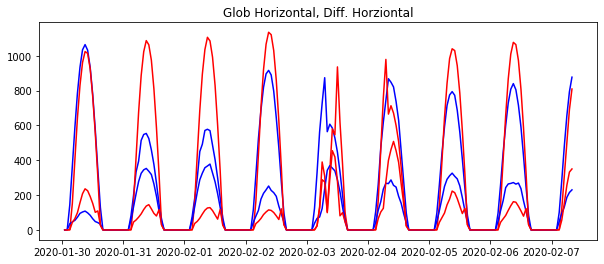

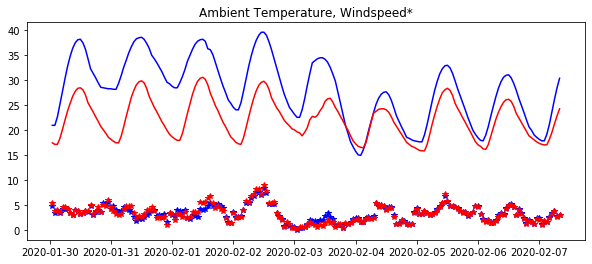

In [33]:
case = case1
timeindex = 200

print("CASE 1, Australia Comparison")
print("Checking Stuff for day ", case.index[timeindex])
print("*************************")
print("DNI")
print("Input SAM", case['sam_Irradiance DNI from weather file | (W/m2)'][timeindex])
print("")

print("DHI")
print("Input SAM", case['sam_Irradiance DHI from weather file | (W/m2)'][timeindex])
print("Input PVSyst", case['pvsyst_DiffHor'][timeindex])
print("")

print("GHI")
print("Calculated SAM", case['sam_Irradiance GHI calculated | (W/m2)'][timeindex])
print("Non-Input SAM", case['sam_Irradiance GHI from weather file | (W/m2)'][timeindex])
print("Input PVSyst", case['pvsyst_GlobHor'][timeindex])
print("")

timeindex = 2008
print("Checking Values for day ", case.index[timeindex])
print("****************")
print("Ambient Temperature")
print("Input SAM", case['sam_Weather file ambient temperature | (C)'][timeindex])
print("Input PVSyst", case['pvsyst_T_Amb'][timeindex])
print("")

# Wind Speed
print("Wind Speed")
print("SAM", case['sam_Weather file wind speed | (m/s)'][timeindex])
print("PVSyst", case['pvsyst_WindVel'][timeindex])
print("")

# SunPosition
print("Sun Azimuth")
print("SAM", case['sam_Sun azimuth angle | (deg)'][timeindex])
print("PVSyst", case['pvsyst_AzSol'][timeindex]+180)
print("")

print("Sun Altitude/Elevation")
print("SAM", case['sam_Sun altitude angle | (deg)'][timeindex])
print("PVSyst", case['pvsyst_HSol'][timeindex])
case = case2

timeindexstart = 700
timeindexend = 900

print(case.index[timeindexstart])
print(case.index[timeindexend])

import matplotlib.pyplot as plt

plt.plot(case['sam_Irradiance GHI from weather file | (W/m2)'][timeindexstart:timeindexend], 'b', label='SAM')
plt.plot(case['pvsyst_GlobHor'][timeindexstart:timeindexend], 'r', label='PVSyst')
plt.plot(case['sam_Irradiance DHI from weather file | (W/m2)'][timeindexstart:timeindexend], 'b', label='SAM')
plt.plot(case['pvsyst_DiffHor'][timeindexstart:timeindexend], 'r', label='PVSyst')
plt.title("Glob Horizontal, Diff. Horziontal")

plt.figure()
plt.plot(case['sam_Weather file ambient temperature | (C)'][timeindexstart:timeindexend], 'b', label='SAM Temp.')
plt.plot(case['pvsyst_T_Amb'][timeindexstart:timeindexend], 'r', label='PVSyst Temp.')
plt.plot(case['sam_Weather file wind speed | (m/s)'][timeindexstart:timeindexend], 'b*', label='SAM Wind')
plt.plot(case['pvsyst_WindVel'][timeindexstart:timeindexend], 'r*', label='PVSyst Wind')
plt.title("Ambient Temperature, Windspeed*")



print("")

2020-01-30 04:00:00+10:00
2020-02-07 12:00:00+10:00


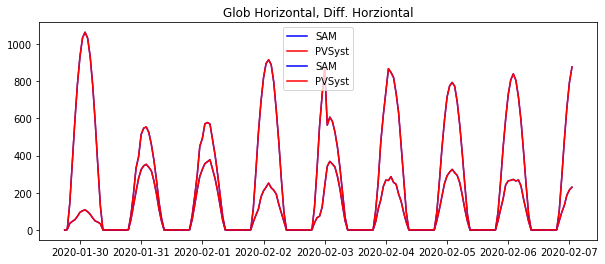

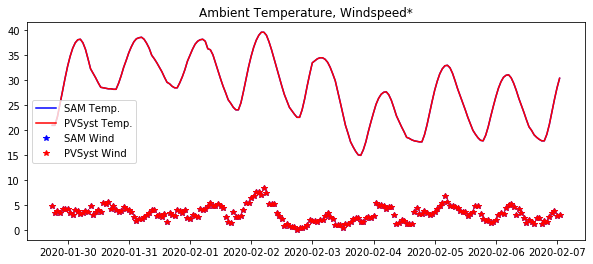

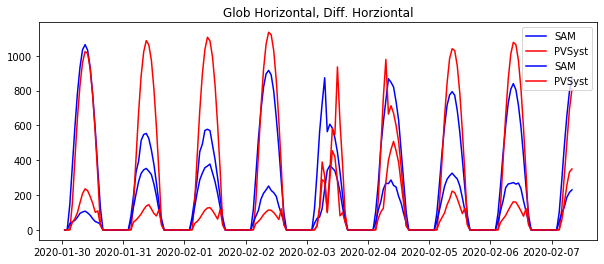

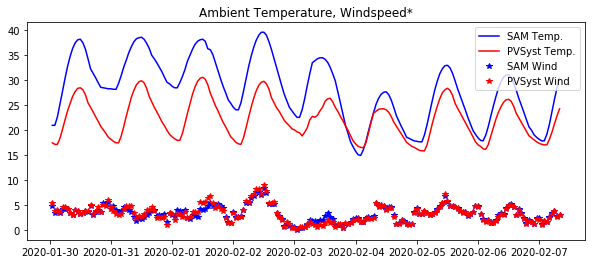

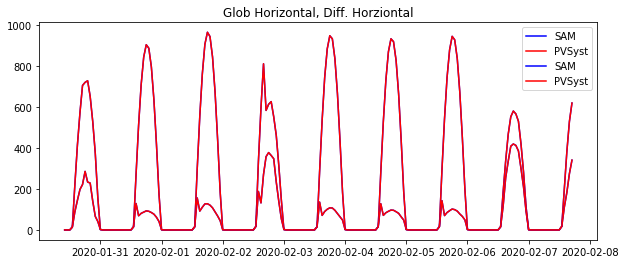

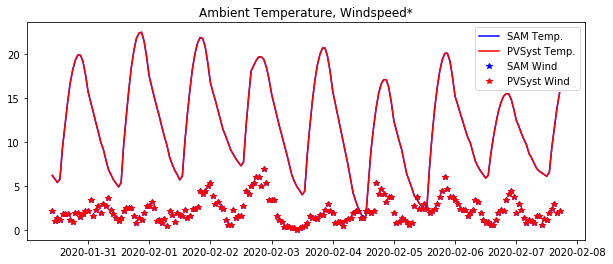

In [34]:
case = case1

timeindexstart = 700
timeindexend = 900

print(case.index[timeindexstart])
print(case.index[timeindexend])


plt.plot(case['sam_Irradiance GHI from weather file | (W/m2)'][timeindexstart:timeindexend], 'b', label='SAM')
plt.plot(case['pvsyst_GlobHor'][timeindexstart:timeindexend], 'r', label='PVSyst')
plt.plot(case['sam_Irradiance DHI from weather file | (W/m2)'][timeindexstart:timeindexend], 'b', label='SAM')
plt.plot(case['pvsyst_DiffHor'][timeindexstart:timeindexend], 'r', label='PVSyst')
plt.title("Glob Horizontal, Diff. Horziontal")
plt.legend()

plt.figure()
plt.plot(case['sam_Weather file ambient temperature | (C)'][timeindexstart:timeindexend], 'b', label='SAM Temp.')
plt.plot(case['pvsyst_T_Amb'][timeindexstart:timeindexend], 'r', label='PVSyst Temp.')
plt.plot(case['sam_Weather file wind speed | (m/s)'][timeindexstart:timeindexend], 'b*', label='SAM Wind')
plt.plot(case['pvsyst_WindVel'][timeindexstart:timeindexend], 'r*', label='PVSyst Wind')
plt.title("Ambient Temperature, Windspeed*")
plt.legend()


case = case2
plt.figure()
plt.plot(case['sam_Irradiance GHI from weather file | (W/m2)'][timeindexstart:timeindexend], 'b', label='SAM')
plt.plot(case['pvsyst_GlobHor'][timeindexstart:timeindexend], 'r', label='PVSyst')
plt.plot(case['sam_Irradiance DHI from weather file | (W/m2)'][timeindexstart:timeindexend], 'b', label='SAM')
plt.plot(case['pvsyst_DiffHor'][timeindexstart:timeindexend], 'r', label='PVSyst')
plt.title("Glob Horizontal, Diff. Horziontal")
plt.legend()

plt.figure()
plt.plot(case['sam_Weather file ambient temperature | (C)'][timeindexstart:timeindexend], 'b', label='SAM Temp.')
plt.plot(case['pvsyst_T_Amb'][timeindexstart:timeindexend], 'r', label='PVSyst Temp.')
plt.plot(case['sam_Weather file wind speed | (m/s)'][timeindexstart:timeindexend], 'b*', label='SAM Wind')
plt.plot(case['pvsyst_WindVel'][timeindexstart:timeindexend], 'r*', label='PVSyst Wind')
plt.title("Ambient Temperature, Windspeed*")
plt.legend()



case = case3
plt.figure()
plt.plot(case['sam_Irradiance GHI from weather file | (W/m2)'][timeindexstart:timeindexend], 'b', label='SAM')
plt.plot(case['pvsyst_GlobHor'][timeindexstart:timeindexend], 'r', label='PVSyst')
plt.plot(case['sam_Irradiance DHI from weather file | (W/m2)'][timeindexstart:timeindexend], 'b', label='SAM')
plt.plot(case['pvsyst_DiffHor'][timeindexstart:timeindexend], 'r', label='PVSyst')
plt.title("Glob Horizontal, Diff. Horziontal")
plt.legend()

plt.figure()
plt.plot(case['sam_Weather file ambient temperature | (C)'][timeindexstart:timeindexend], 'b', label='SAM Temp.')
plt.plot(case['pvsyst_T_Amb'][timeindexstart:timeindexend], 'r', label='PVSyst Temp.')
plt.plot(case['sam_Weather file wind speed | (m/s)'][timeindexstart:timeindexend], 'b*', label='SAM Wind')
plt.plot(case['pvsyst_WindVel'][timeindexstart:timeindexend], 'r*', label='PVSyst Wind')
plt.title("Ambient Temperature, Windspeed*")
plt.legend()


2020-01-30 04:00:00-06:00
2020-02-07 12:00:00-06:00


Text(0.5, 1.0, 'Ambient Temperature, Windspeed*')

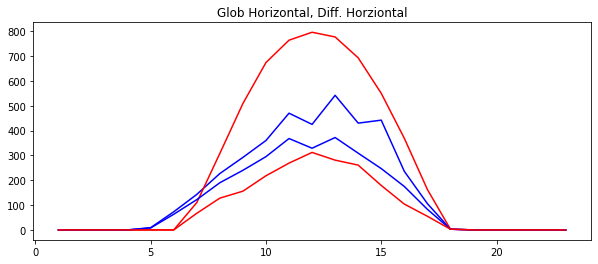

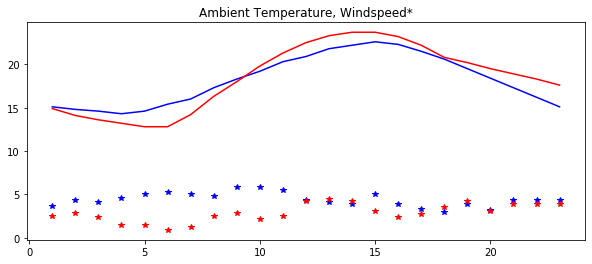

In [35]:
# SANITY CHECK: DD/MM and MM/DD

t1S = '2020-11-06 0:0:0'
t2S = '2020-11-07 0:0:0'
t1P = '2020-06-11 0:0:0'
t2P = '2020-06-12 0:0:0'

"""
t1P = '2020-11-06 0:0:0'
t2P = '2020-11-07 0:0:0'
"""

t1S = '2020-11-06 0:0:0'
t2S = '2020-11-07 0:0:0'


x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

caseS = case2[(case2.index>t1S) & (case2.index<t2S)]
caseP = case2[(case2.index>t1P) & (case2.index<t2P)]

len(case)

print(case.index[timeindexstart])
print(case.index[timeindexend])

import matplotlib.pyplot as plt

plt.plot(x, caseS['sam_Irradiance GHI from weather file | (W/m2)'], 'b', label='SAM')
plt.plot(x, caseP['pvsyst_GlobHor'], 'r', label='PVSyst')
plt.plot(x, caseS['sam_Irradiance DHI from weather file | (W/m2)'], 'b', label='SAM')
plt.plot(x, caseP['pvsyst_DiffHor'], 'r', label='PVSyst')
plt.title("Glob Horizontal, Diff. Horziontal")

plt.figure()
plt.plot(x, caseS['sam_Weather file ambient temperature | (C)'], 'b', label='SAM Temp.')
plt.plot(x, caseP['pvsyst_T_Amb'], 'r', label='PVSyst Temp.')
plt.plot(x, caseS['sam_Weather file wind speed | (m/s)'], 'b*', label='SAM Wind')
plt.plot(x, caseP['pvsyst_WindVel'], 'r*', label='PVSyst Wind')
plt.title("Ambient Temperature, Windspeed*")

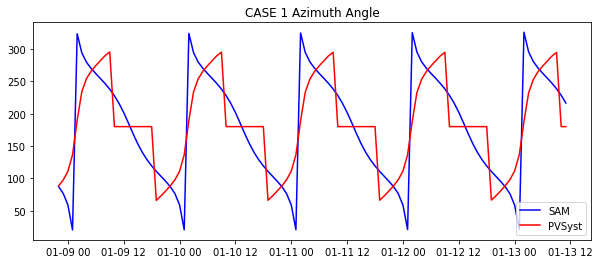

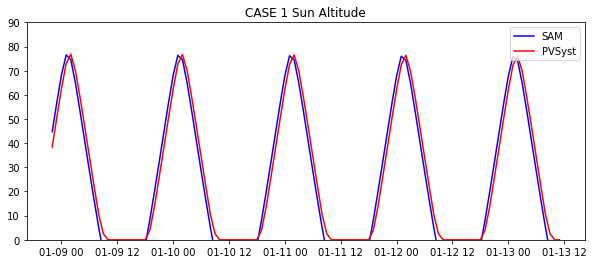

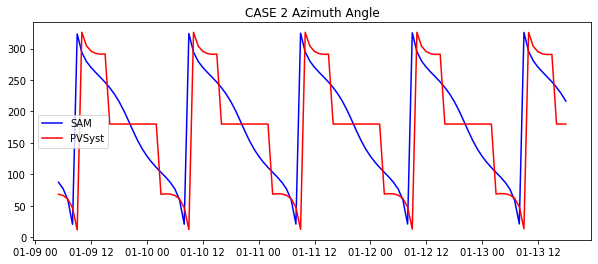

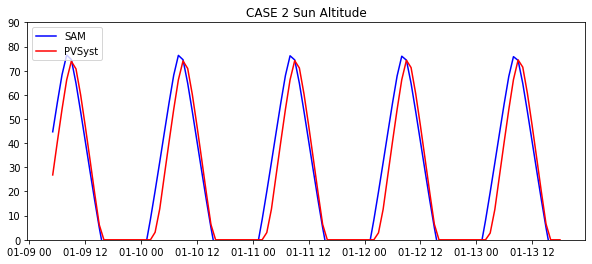

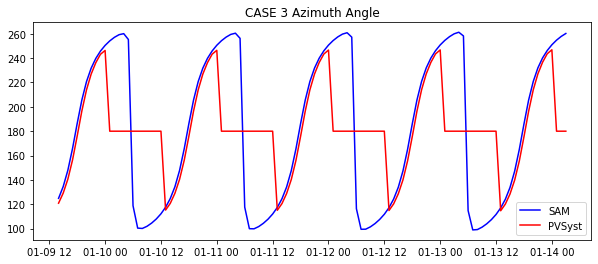

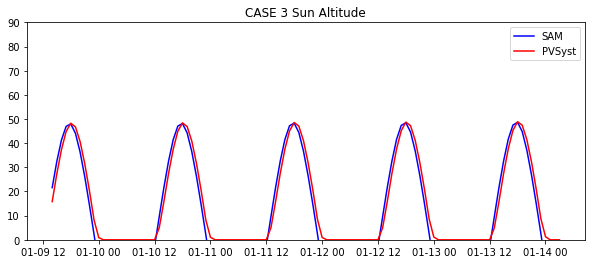

In [36]:
timeindexstart = 200
timeindexend = 310

case=case1
plt.plot(case['sam_Sun azimuth angle | (deg)'][timeindexstart:timeindexend], 'b', label='SAM')
plt.plot(case['pvsyst_AzSol'][timeindexstart:timeindexend]+180, 'r', label='PVSyst')
plt.title("CASE 1 Azimuth Angle")
plt.legend()

plt.figure()
plt.plot(case['sam_Sun altitude angle | (deg)'][timeindexstart:timeindexend], 'b', label='SAM')
plt.plot(case['pvsyst_HSol'][timeindexstart:timeindexend], 'r', label='PVSyst')
plt.title("CASE 1 Sun Altitude")
plt.ylim([0,90])
plt.legend()


case=case2
plt.figure()
plt.plot(case['sam_Sun azimuth angle | (deg)'][timeindexstart:timeindexend], 'b', label='SAM')
plt.plot(case['pvsyst_AzSol'][timeindexstart:timeindexend]+180, 'r', label='PVSyst')
plt.title("CASE 2 Azimuth Angle")
plt.legend()

plt.figure()
plt.plot(case['sam_Sun altitude angle | (deg)'][timeindexstart:timeindexend], 'b', label='SAM')
plt.plot(case['pvsyst_HSol'][timeindexstart:timeindexend], 'r', label='PVSyst')
plt.title("CASE 2 Sun Altitude")
plt.ylim([0,90])
plt.legend()



case=case3
plt.figure()
plt.plot(case['sam_Sun azimuth angle | (deg)'][timeindexstart:timeindexend], 'b', label='SAM')
plt.plot(case['pvsyst_AzSol'][timeindexstart:timeindexend]+180, 'r', label='PVSyst')
plt.title("CASE 3 Azimuth Angle")
plt.legend()

plt.figure()
plt.plot(case['sam_Sun altitude angle | (deg)'][timeindexstart:timeindexend], 'b', label='SAM')
plt.plot(case['pvsyst_HSol'][timeindexstart:timeindexend], 'r', label='PVSyst')
plt.title("CASE 3 Sun Altitude")
plt.ylim([0,90])
plt.legend()





### Looking at 1 day

Case 3 looks good,
Case 1 looks ok
Case 3 looks terrible

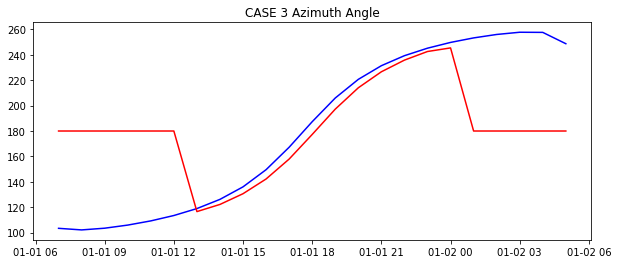

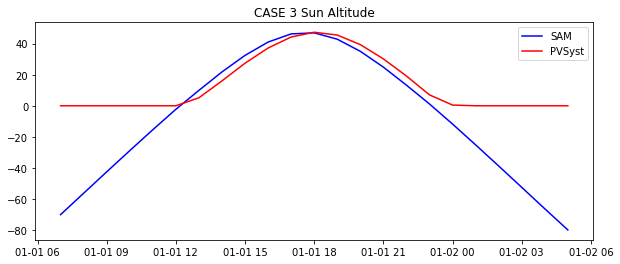

In [37]:
t1S = '2020-01-01 0:0:0'
t2S = '2020-01-02 0:0:0'

case=case3
case = case[(case.index>t1S) & (case.index<t2S)]

plt.plot(case['sam_Sun azimuth angle | (deg)'], 'b', label='SAM')
plt.plot(case['pvsyst_AzSol']+180, 'r', label='PVSyst')
plt.title("CASE 3 Azimuth Angle")

plt.figure()
plt.plot(case['sam_Sun altitude angle | (deg)'], 'b', label='SAM')
plt.plot(case['pvsyst_HSol'], 'r', label='PVSyst')
plt.title("CASE 3 Sun Altitude")
plt.legend()

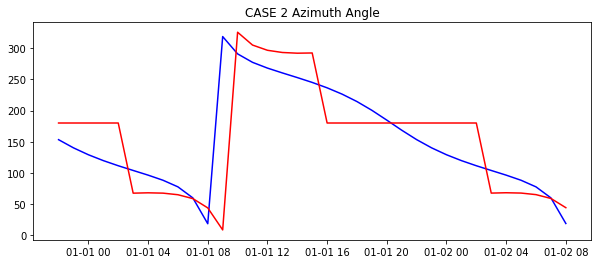

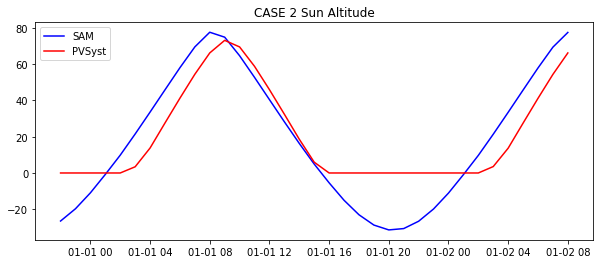

In [38]:
t1S = '2020-01-01 0:0:0'
t2S = '2020-01-02 12:0:0'

case=case2
case = case[(case.index>t1S) & (case.index<t2S)]

plt.plot(case['sam_Sun azimuth angle | (deg)'], 'b', label='SAM')
plt.plot(case['pvsyst_AzSol']+180, 'r', label='PVSyst')
plt.title("CASE 2 Azimuth Angle")

plt.figure()
plt.plot(case['sam_Sun altitude angle | (deg)'], 'b', label='SAM')
plt.plot(case['pvsyst_HSol'], 'r', label='PVSyst')
plt.title("CASE 2 Sun Altitude")
plt.legend()

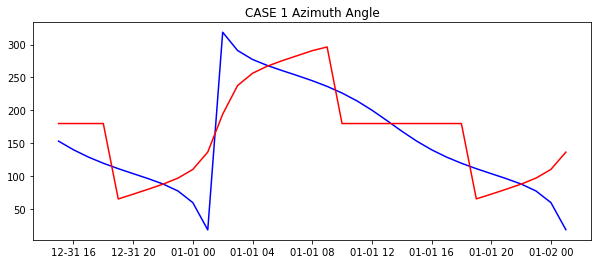

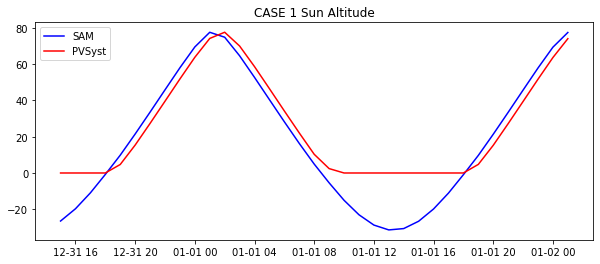

In [39]:
t1S = '2020-01-01 0:0:0'
t2S = '2020-01-02 12:0:0'

case=case1
case = case[(case.index>t1S) & (case.index<t2S)]

plt.plot(case['sam_Sun azimuth angle | (deg)'], 'b', label='SAM')
plt.plot(case['pvsyst_AzSol']+180, 'r', label='PVSyst')
plt.title("CASE 1 Azimuth Angle")

plt.figure()
plt.plot(case['sam_Sun altitude angle | (deg)'], 'b', label='SAM')
plt.plot(case['pvsyst_HSol'], 'r', label='PVSyst')
plt.title("CASE 1 Sun Altitude")
plt.legend()

# READ SPA

In [212]:
file2= r'C:\Users\sayala\Desktop\Costal\SPA_Tanzania.txt'
spa2 = pd.read_csv(file2)
spa2.keys()

Index(['Date (M/D/YYYY)', 'Time (H:MM:SS)', 'Topocentric zenith angle',
       'Top. azimuth angle (eastward from N)'],
      dtype='object')

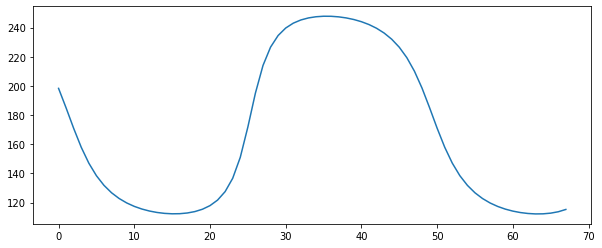

In [218]:
plt.plot(spa2['Top. azimuth angle (eastward from N)'][0:68])